# **Análise dos Dados de Vendas Automotivas**
##### **Feito por: Fernando Antonio e Michely Serras**


[Clique aqui para acessar a base de dados](https://drive.google.com/file/d/1Wib1W8IBw5tLoVXtV5XQ4_KqRmGxCPgl/view?usp=drive_link)
<div>
    <a href="https://drive.google.com/file/d/1Wib1W8IBw5tLoVXtV5XQ4_KqRmGxCPgl/view?usp=drive_link">
        <img src="../image/mcqueen.png" width="300px">
    </a>
</div>



### **Descrição geral da base de dados**
Base de dados com registro de pedidos realizados em uma empresa do setor automobilístico. Permite avaliar o desempenho de vendas, perfis de clientes e padrões de compras.

### **Desafios da Análise:**
- Analisar os padrões de compra por cliente ou produto.
- Relacionar categorias de produtos com volume de vendas.
- Avaliar o tempo entre pedidos e sua relação com o tamanho do negócio.
- Identificar clientes com maior potencial de retorno financeiro.

---

### ***1. Análise Inicial dos Dados***

#### **1.1 Tema e Contexto Empresarial**:
 A base apresenta dados sobre os pedidos realizados em uma empresa do setor automobilístico, em conjunto a informações que permitem avaliar o desempenho de vendas, os perfis de clientes e os padrões de compras. Dessa forma, é possível analisar e levantar hipóteses sobre fatores que influenciam os resultados comerciais da empresa.



#### **1.2 Dicionário de Dados Traduzido** 

- **orderNumber**:  Numero de identificação do pedido.
- **QuantityOrdered**:  Quantidade de itens solicitados.
- **PriceEach**:  Preço unitário de cada item.
- **OrderLineNumber**:  Número da linha dentro do pedido.
- **Sales**:  Total da venda (quantidade x preço).
- **OrderDate**:  Data do pedido.
- **Days_Since_LastOrder**:  Dias desde o ultimo pedido do cliente.
- **Status**:  Status do pedido (ex: Enviado, Em Processamento, Cancelado).
- **ProductLine**:  Categoria do produto.
- **MSRP**:  Preço sugerido pelo fabricante.
- **CustomerName**:  Nome do cliente.
- **Phone**:  Telefone de contato do Cliente.
- **Addressline1**:  Endereço do cliente.
- **City**:  Cidade do cliente.
- **Postalcode**:  Código posral do cliente.
- **Country**:  País do cliente.
- **ContactLastName**: Sobrenome do contato
- **ContactFirstName**:  Nome do Contato.
- **Dealsize**:  Tamanho do pedido (Pequeno, Médio, Grande).
<\n>

**Número de Registros: 2747**

#### **1.1.1 Obtenção dos Dados**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
sns.set_theme(style="darkgrid", palette='rocket')

In [21]:
filePath = '../base/08_vendas_automotivas.csv'
df = pd.read_csv(filePath, sep=',')

if not df.empty:
    print("Os dados foram carregados corretamente.")
else:
    print("Erro ao obter dados.")


Os dados foram carregados corretamente.


In [22]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


<br>

#### **1.2 Quantidade de dados nulos em cada variável**


In [71]:
variaveisNulas = df.isnull().sum()
porcentagem  = (variaveisNulas / df.shape[0]) * 100

tabela_VariaveisNulas = pd.DataFrame({
    'Variáveis': df.columns,
    'Quantidade de Nulos': variaveisNulas.values,
    'Percentual (%)': porcentagem
})

# Como a tabela estava usando as variaveis como indice e repetindo eles, usamos o reset index para deixa-los numérico
tabela_VariaveisNulas = tabela_VariaveisNulas.reset_index(drop=True)

print(f" \n\t Tabela - Quantidade de Dados Nulos Por Variável \n")
tabela_VariaveisNulas

 
	 Tabela - Quantidade de Dados Nulos Por Variável 



,Variáveis,Quantidade de Nulos,Percentual (%)
0,ORDERNUMBER,0,0.0
1,QUANTITYORDERED,0,0.0
2,PRICEEACH,0,0.0
3,ORDERLINENUMBER,0,0.0
4,SALES,0,0.0
5,ORDERDATE,0,0.0
6,DAYS_SINCE_LASTORDER,0,0.0
7,STATUS,0,0.0
8,PRODUCTLINE,0,0.0
9,MSRP,0,0.0


<br>

#### **1.3 Limpeza de Dados**

#### **Critérios para Realização da Limpeza de Dados**
A partir da tabela apresentada, pudemos observar que não há valores nulos em nenhuma das varáveis presentes na base de dados.  
Portanto, decidimos que não seria necessário realizar técnicas de limpeza de dados, pois eles já se encontram completos.

---
---

### **2. Análise Estatística e Visual**

#### **O que fazer nessa etapa:** 
- Distribuição das variáveis com histogramas e boxplots
- Medidas de tendência central e dispersão
- Matriz de correlação entre variáveis numéricas

<hr height='0.5px'>
De acordo com o ANEXO I, devemos fazer a análise estatística e visual destes tópicos: 

- Analisar os padrões de compra por cliente ou produto.
- Relacionar categorias de produtos com volume de vendas.
- Avaliar o tempo entre pedidos e sua relação com o tamanho do negócio.
- Identificar clientes com maior potencial de retorno financeiro.


#### **2.1 Histogramas e Boxplots**

array([[<Axes: title={'center': 'ORDERNUMBER'}>,
        <Axes: title={'center': 'QUANTITYORDERED'}>,
        <Axes: title={'center': 'PRICEEACH'}>],
       [<Axes: title={'center': 'ORDERLINENUMBER'}>,
        <Axes: title={'center': 'SALES'}>,
        <Axes: title={'center': 'DAYS_SINCE_LASTORDER'}>],
       [<Axes: title={'center': 'MSRP'}>, <Axes: >, <Axes: >]],
      dtype=object)

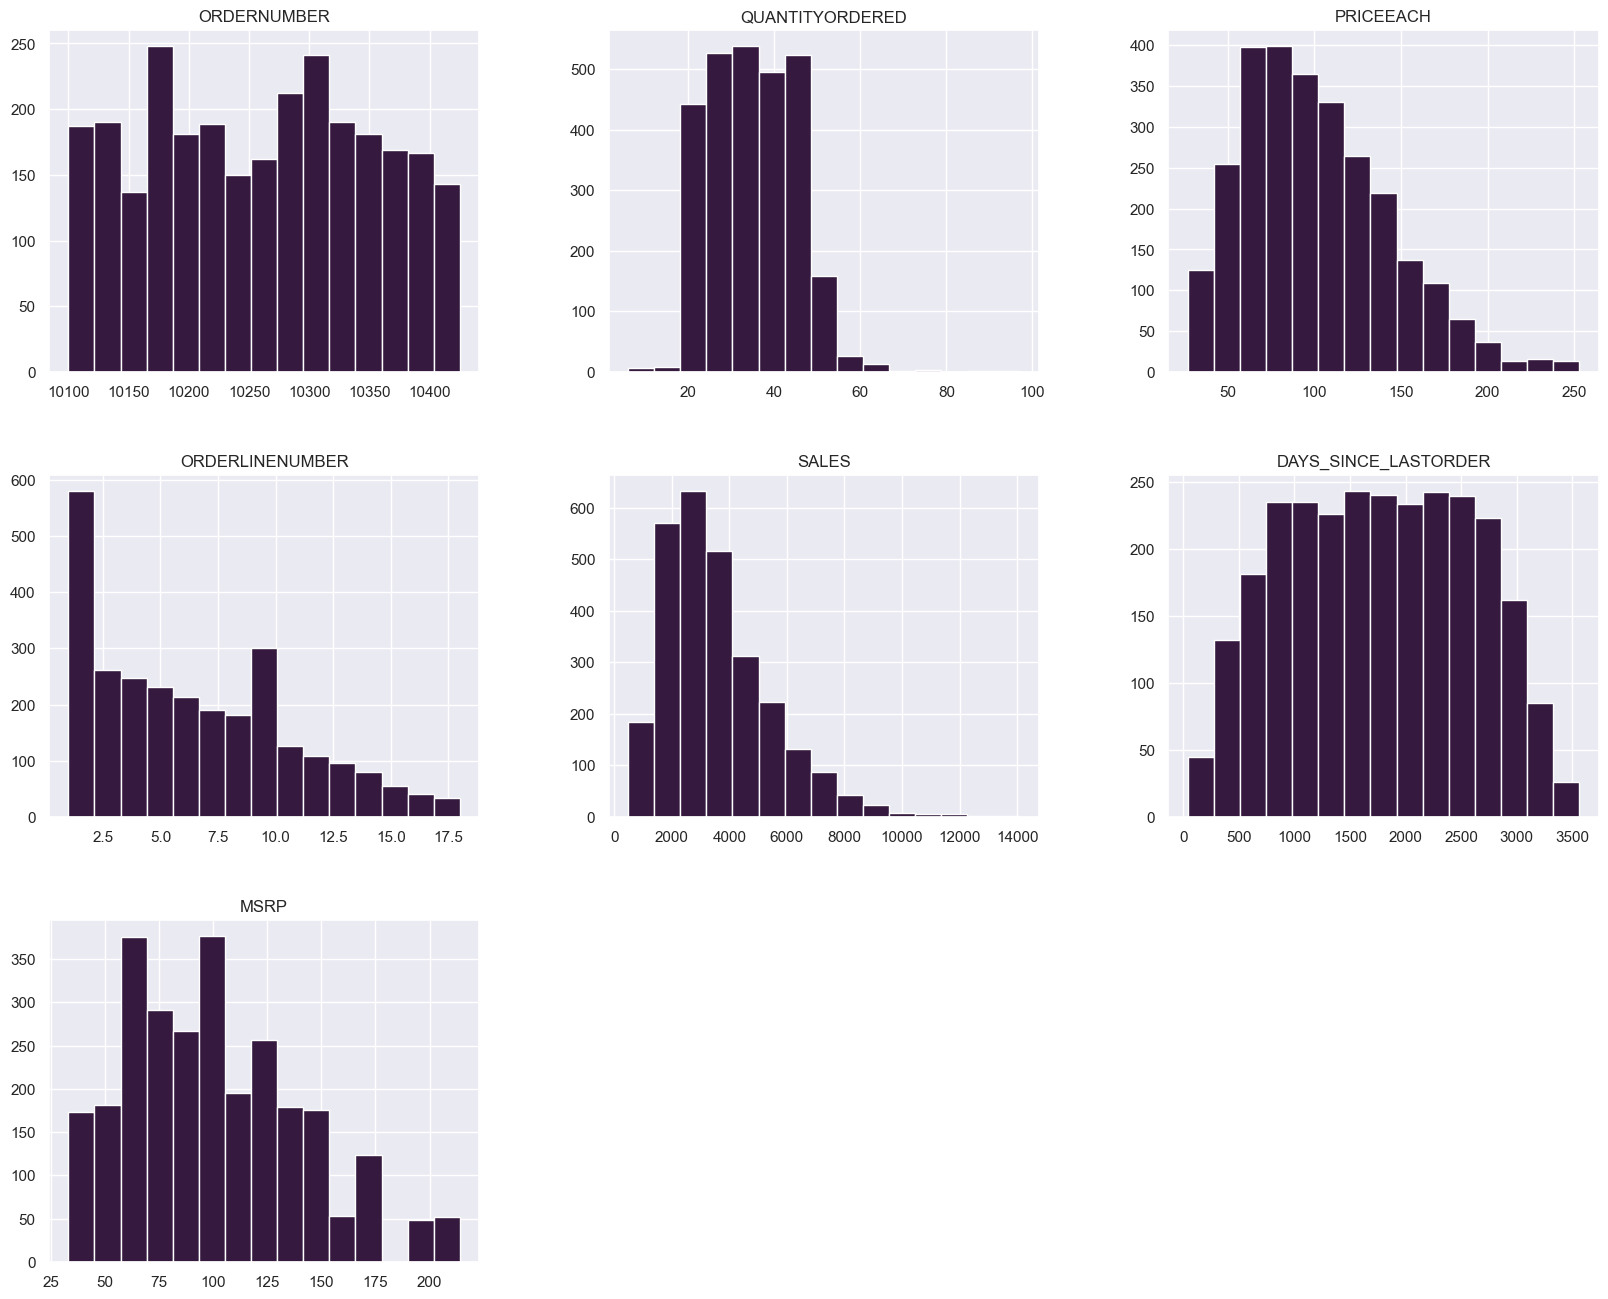

In [31]:
df.hist(bins=15, figsize=(20,16))

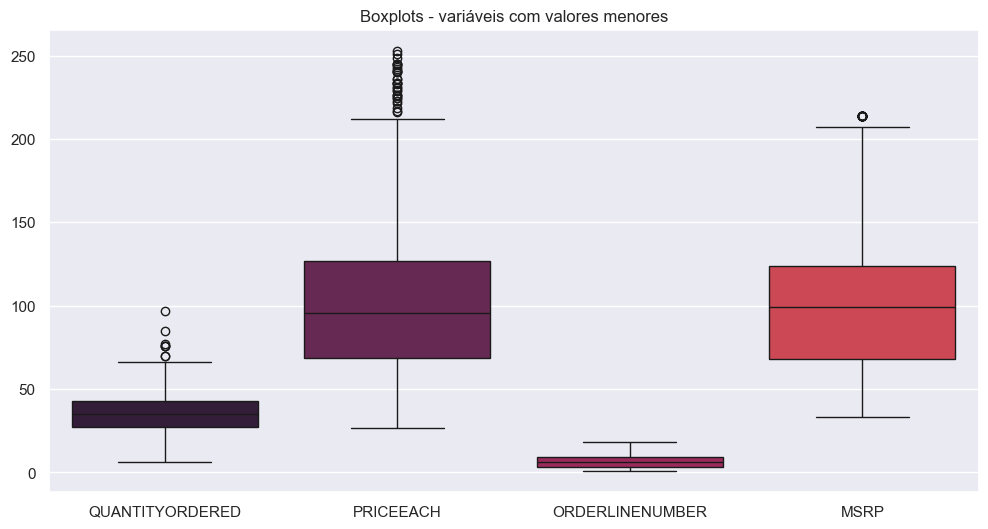

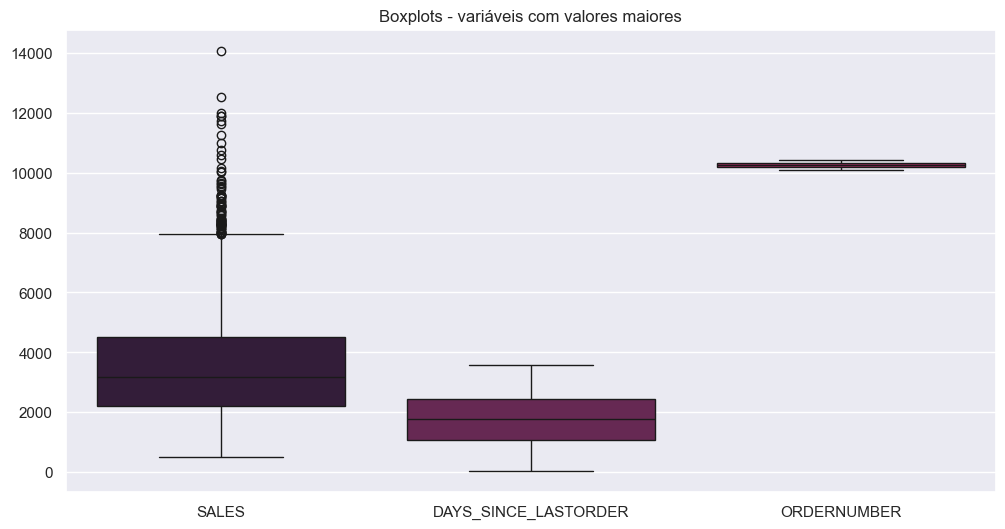

In [70]:
# Boxplots para variáveis com valores menores
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'MSRP']])
plt.title('Boxplots - variáveis com valores menores')
plt.show()

# Boxplots para variáveis com valores maiores
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['SALES', 'DAYS_SINCE_LASTORDER', 'ORDERNUMBER']])
plt.title('Boxplots - variáveis com valores maiores')
plt.show()


#### **Explicação sobre a divisão dos boxplots**
Como os dados apresentam faixas de valores muito distintas, optamos por dividi-los entre variáveis com valores elevados e variáveis com valores mais baixos. Essa separação facilita a visualização dos boxplots, permitindo uma comparação mais clara e eficiente entre as variáveis.

